---
title: "9.1 Kopecek"
author: Karisa Kopecek
date: today
format:
  html:
    embed-resources: true
    echo: true
---

## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [45]:
import pandas as pd
import numpy as np

from plotnine import *

In [46]:
df = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
df

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease
...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease
202,Levern Trantow III,35,0,1,138,183,1,182,Disease


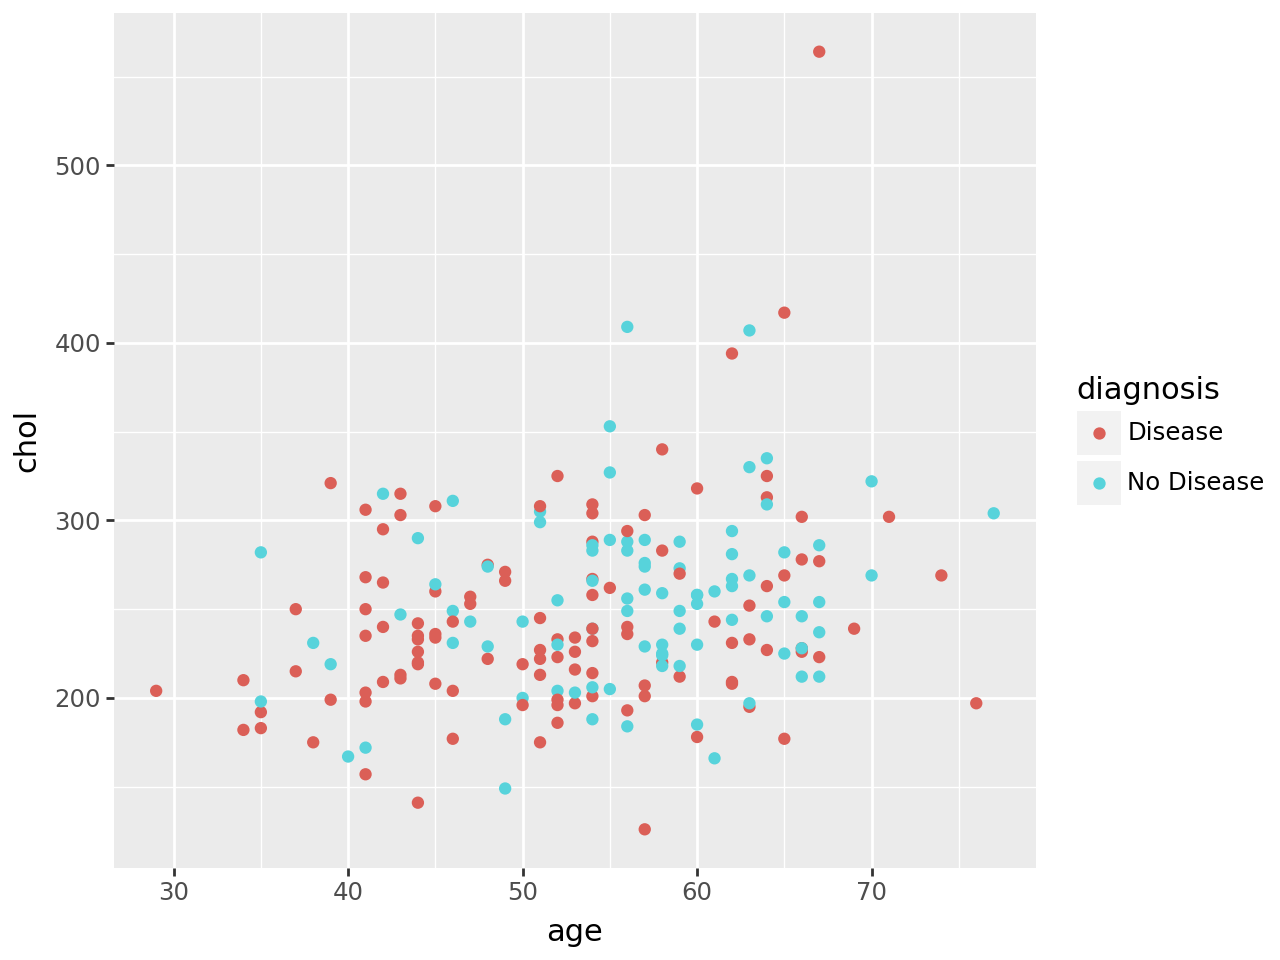

In [47]:
(ggplot(df, aes(x="age", y="chol", color="diagnosis"))
+ geom_point())

In [48]:
df[["age", "chol"]].describe()

,age,chol
count,204.000000,204.000000
mean,53.813725,248.377451
std,9.354781,53.176624
min,29.000000,126.000000
25%,46.000000,212.750000
50%,54.000000,241.000000
75%,61.000000,276.250000
max,77.000000,564.000000


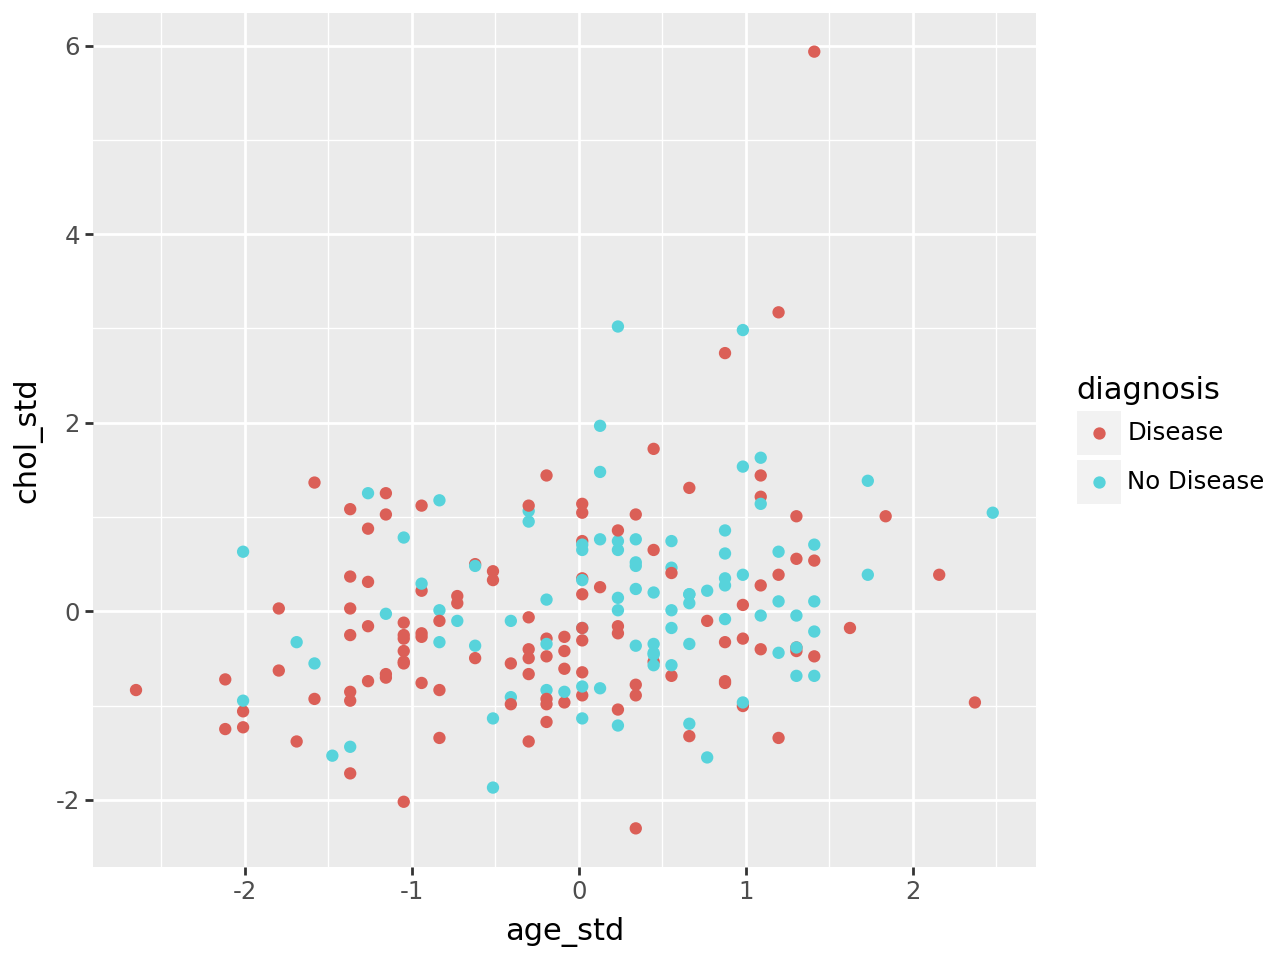

In [49]:
df["age_std"] = (df["age"] - df["age"].mean()) / df["age"].std()
df["chol_std"] = (df["chol"] - df["chol"].mean()) / df["chol"].std()

(ggplot(df, aes(x="age_std", y="chol_std", color="diagnosis"))
+ geom_point())

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = df[['age', 'chol']]
y = df['diagnosis']

logistic_model = Pipeline(
  [("standardize", StandardScaler()),
  ("logistic", LogisticRegression())]
)

logistic_model_fitted = logistic_model.fit(X, y)

logistic_model_fitted



Pipeline(steps=[('standardize', StandardScaler()),
                ('logistic', LogisticRegression())])

In [51]:
logistic_model_fitted.named_steps['logistic'].coef_, logistic_model_fitted.named_steps['logistic'].intercept_

(array([[0.42746115, 0.09597543]]), array([-0.27025982]))

In [52]:
logistic_age_coef = logistic_model_fitted.named_steps['logistic'].coef_[0][0]
logistic_chol_coef = logistic_model_fitted.named_steps['logistic'].coef_[0][1]
logistic_intercept = logistic_model_fitted.named_steps['logistic'].intercept_

logistic_age_coef, logistic_chol_coef, logistic_intercept

(np.float64(0.42746115369956383),
 np.float64(0.09597542617159378),
 array([-0.27025982]))

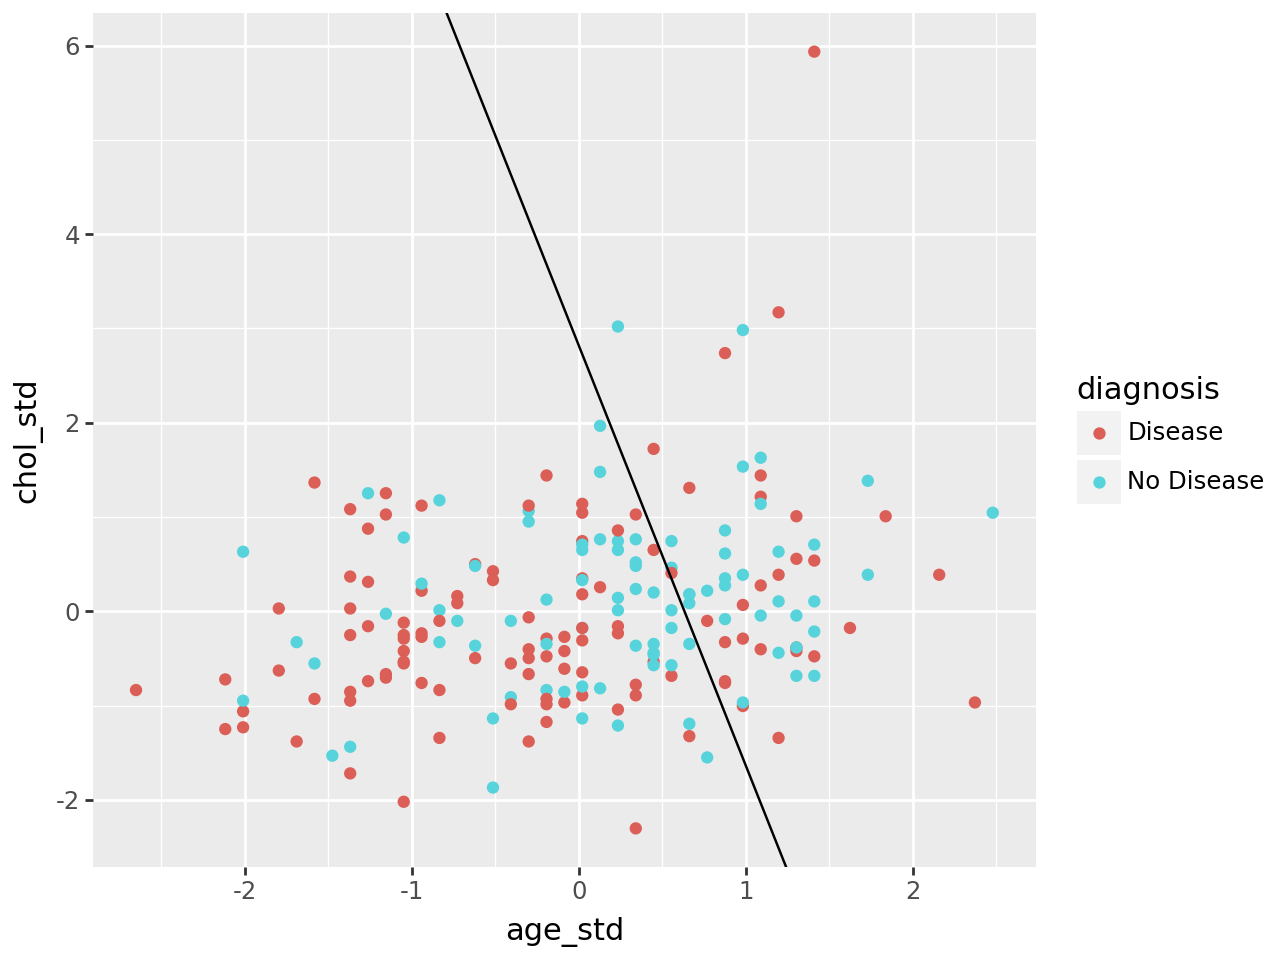

In [53]:
(ggplot(df, aes(x="age_std", y="chol_std", color="diagnosis"))
+ geom_point()
+ geom_abline(intercept = - logistic_intercept / logistic_chol_coef, slope = - logistic_age_coef / logistic_chol_coef, color = "black"))

In [54]:
logistic_predictions = logistic_model.predict(X)

In [55]:
logistic_probs = logistic_model.predict_proba(X)[:, 1]

In [56]:
logistic_scores = logistic_intercept + logistic_age_coef * df['age_std'] + logistic_chol_coef * df['chol_std']

In [57]:
df["logistic_prediction"] = logistic_predictions
df["logistic_prob"] = logistic_probs
df["logistic_score"] = logistic_scores

df

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis,age_std,chol_std,logistic_prediction,logistic_prob,logistic_score
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease,0.661295,-0.345593,Disease,0.494966,-0.020750
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease,0.661295,1.309270,No Disease,0.534714,0.138076
2,Miles Wolf,62,0,3,130,263,1,97,No Disease,0.875090,0.274981,No Disease,0.532749,0.130199
3,Mikaila Block,43,1,1,115,303,1,181,Disease,-1.155957,1.027191,Disease,0.339219,-0.665801
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease,1.302679,1.008386,No Disease,0.595072,0.383365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease,0.126809,-0.815724,Disease,0.426926,-0.294343
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease,-0.300779,-0.402008,Disease,0.392259,-0.437414
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease,-1.262854,0.876749,Disease,0.325841,-0.725935
202,Levern Trantow III,35,0,1,138,183,1,182,Disease,-2.011135,-1.229440,Disease,0.222641,-1.247938


In [58]:
pd.crosstab(df["logistic_prediction"], df["diagnosis"])

diagnosis,Disease,No Disease
logistic_prediction,,
Disease,86,57
No Disease,29,32


In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, logistic_predictions)

array([[86, 29],
       [57, 32]])

In [60]:
#Code I added to answer question: For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

age_std = (55 - df["age"].mean()) / df["age"].std()

#solving equation for cholesterol standard deviation
# 0 = intercept + age_coef * age_55_std + chol_coef * chol_std
# chol_std = -(intercept + age_coef * age_55_std) / chol_coef
chol_std_needed = -(logistic_intercept + logistic_age_coef * age_std) / logistic_chol_coef
chol_needed = chol_std_needed * df["chol"].std() + df["chol"].mean()
chol_needed


array([368.08525191])

In [61]:
# question: How high for the doctors to estimate a 90% chance that heart disease is present?

# For 90% probability
target_logit = np.log(0.9 / 0.1)

#equation used below
# target_logit = intercept + age_coef * age_55_std + chol_coef * chol_std
chol_std_needed = (target_logit - logistic_intercept - logistic_age_coef * age_std) / logistic_chol_coef
chol_needed = chol_std_needed * df["chol"].std() + df["chol"].mean()

chol_needed

array([1585.49048461])

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df[['age', 'chol']]
y = df['diagnosis']

lda_model = Pipeline(
  [("standardize", StandardScaler()),
  ("lda", LinearDiscriminantAnalysis())]
)

lda_model_fitted = lda_model.fit(X, y)

lda_model_fitted



Pipeline(steps=[('standardize', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis())])

In [63]:
lda_age_coef = lda_model_fitted.named_steps['lda'].coef_[0][0]
lda_chol_coef = lda_model_fitted.named_steps['lda'].coef_[0][1]
lda_intercept = lda_model_fitted.named_steps['lda'].intercept_

lda_age_coef, lda_chol_coef, lda_intercept

(np.float64(0.4344658185163842),
 np.float64(0.09493491278066943),
 array([-0.26973565]))

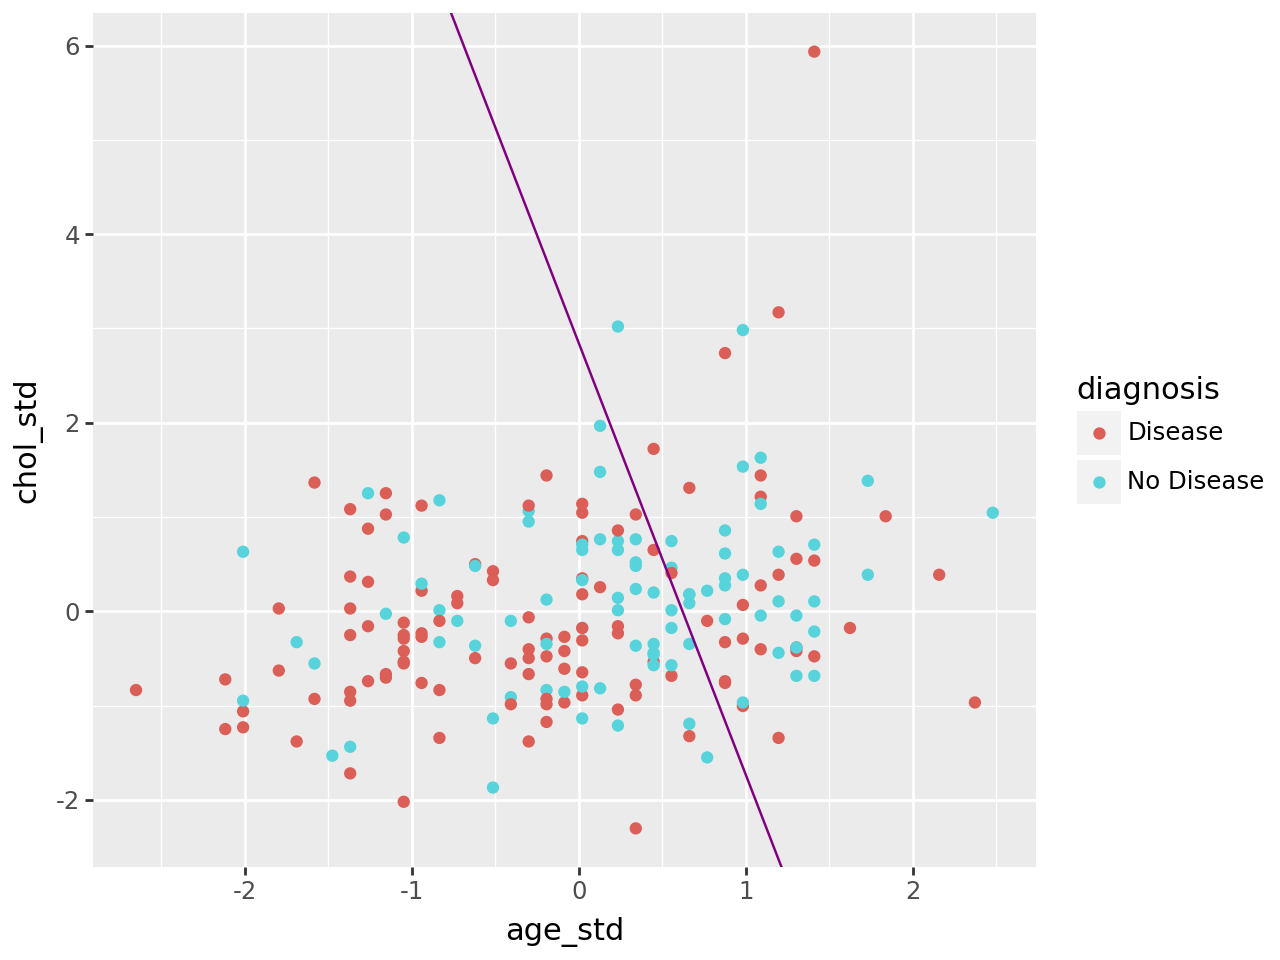

In [64]:
(ggplot(df, aes(x="age_std", y="chol_std", color="diagnosis"))
+ geom_point()
+ geom_abline(intercept = - lda_intercept / lda_chol_coef, slope = - lda_age_coef / lda_chol_coef, color = "purple"))

In [65]:
lda_predictions = lda_model.predict(X)

In [66]:
lda_probs = lda_model.predict_proba(X)[:, 1]

In [67]:
lda_scores = lda_intercept + lda_age_coef * df['age_std'] + lda_chol_coef * df['chol_std']

In [68]:
df["lda_prediction"] = lda_predictions
df["lda_prob"] = lda_probs
df["lda_score"] = lda_scores

df

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis,age_std,chol_std,logistic_prediction,logistic_prob,logistic_score,lda_prediction,lda_prob,lda_score
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease,0.661295,-0.345593,Disease,0.494966,-0.020750,Disease,0.496348,-0.015234
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease,0.661295,1.309270,No Disease,0.534714,0.138076,No Disease,0.535660,0.141870
2,Miles Wolf,62,0,3,130,263,1,97,No Disease,0.875090,0.274981,No Disease,0.532749,0.130199,No Disease,0.534337,0.136566
3,Mikaila Block,43,1,1,115,303,1,181,Disease,-1.155957,1.027191,Disease,0.339219,-0.665801,Disease,0.337280,-0.674443
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease,1.302679,1.008386,No Disease,0.595072,0.383365,No Disease,0.597147,0.391965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease,0.126809,-0.815724,Disease,0.426926,-0.294343,Disease,0.427481,-0.292082
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease,-0.300779,-0.402008,Disease,0.392259,-0.437414,Disease,0.391981,-0.438579
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease,-1.262854,0.876749,Disease,0.325841,-0.725935,Disease,0.323811,-0.735169
202,Levern Trantow III,35,0,1,138,183,1,182,Disease,-2.011135,-1.229440,Disease,0.222641,-1.247938,Disease,0.220517,-1.260222


In [69]:
pd.crosstab(df["lda_prediction"], df["diagnosis"])

diagnosis,Disease,No Disease
lda_prediction,,
Disease,86,57
No Disease,29,32


In [70]:
confusion_matrix(y, lda_predictions)

array([[86, 29],
       [57, 32]])

In [71]:
pd.crosstab(df["lda_prediction"], df["logistic_prediction"])

logistic_prediction,Disease,No Disease
lda_prediction,,
Disease,143,0
No Disease,0,61


In [72]:
#question: For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

lda_chol_std_needed = -(lda_intercept + lda_age_coef * age_std) / lda_chol_coef
lda_chol_needed = lda_chol_std_needed * df["chol"].std() + df["chol"].mean()
lda_chol_needed

array([368.60612891])

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [73]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = df[['age', 'chol']]
y = df['diagnosis']

# Define parameter grid for tuning regularization parameter C
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100]}

svc_pipeline = Pipeline(
  [("standardize", StandardScaler()),
  ("svc", SVC(kernel="linear", probability=True))]
)

svc_pipeline_grid = GridSearchCV(svc_pipeline, param_grid, cv=5)
svc_pipeline_grid.fit(X, y)

# Best fitted pipeline & the SVC inside it
svc_pipeline_best = svc_pipeline_grid.best_estimator_
svc_model_best = svc_pipeline_best.named_steps["svc"]

svc_model_best

SVC(C=10, kernel='linear', probability=True)

In [74]:
svc_age_coef  = svc_model_best.coef_[0][0]
svc_chol_coef = svc_model_best.coef_[0][1]
svc_intercept = svc_model_best.intercept_[0]

svc_age_coef, svc_chol_coef, svc_intercept

(np.float64(0.6009556681731714),
 np.float64(0.19360163718551782),
 np.float64(-0.31134523984506396))

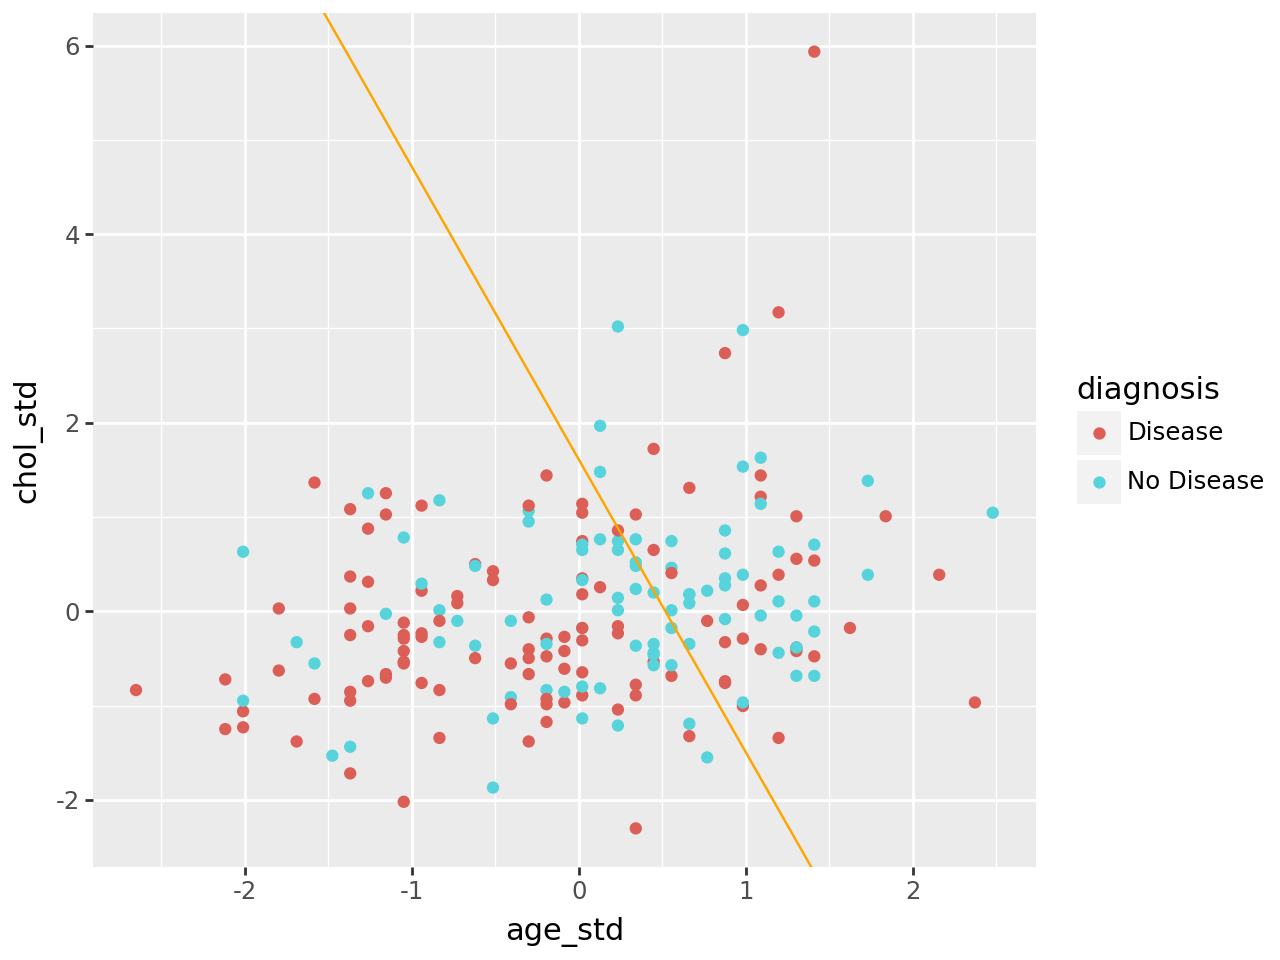

In [75]:
(ggplot(df, aes(x="age_std", y="chol_std", color="diagnosis"))
+ geom_point()
+ geom_abline(intercept = - svc_intercept / svc_chol_coef, slope = - svc_age_coef / svc_chol_coef, color = "orange"))

In [76]:
svc_predictions = svc_pipeline_best.predict(X)

In [77]:
svc_probs = svc_pipeline_best.predict_proba(X)[:, 1]

In [78]:
svc_scores = svc_intercept + svc_age_coef * df['age_std'] + svc_chol_coef * df['chol_std']

In [79]:
df["svc_prediction"] = svc_predictions
df["svc_prob"] = svc_probs
df["svc_score"] = svc_scores

df

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis,age_std,chol_std,logistic_prediction,logistic_prob,logistic_score,lda_prediction,lda_prob,lda_score,svc_prediction,svc_prob,svc_score
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease,0.661295,-0.345593,Disease,0.494966,-0.020750,Disease,0.496348,-0.015234,No Disease,0.449538,0.019157
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease,0.661295,1.309270,No Disease,0.534714,0.138076,No Disease,0.535660,0.141870,No Disease,0.459527,0.339541
2,Miles Wolf,62,0,3,130,263,1,97,No Disease,0.875090,0.274981,No Disease,0.532749,0.130199,No Disease,0.534337,0.136566,No Disease,0.457285,0.267782
3,Mikaila Block,43,1,1,115,303,1,181,Disease,-1.155957,1.027191,Disease,0.339219,-0.665801,Disease,0.337280,-0.674443,Disease,0.424087,-0.807158
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease,1.302679,1.008386,No Disease,0.595072,0.383365,No Disease,0.597147,0.391965,No Disease,0.469775,0.666732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease,0.126809,-0.815724,Disease,0.426926,-0.294343,Disease,0.427481,-0.292082,Disease,0.436777,-0.393064
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease,-0.300779,-0.402008,Disease,0.392259,-0.437414,Disease,0.391981,-0.438579,Disease,0.431339,-0.569930
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease,-1.262854,0.876749,Disease,0.325841,-0.725935,Disease,0.323811,-0.735169,Disease,0.421246,-0.900525
202,Levern Trantow III,35,0,1,138,183,1,182,Disease,-2.011135,-1.229440,Disease,0.222641,-1.247938,Disease,0.220517,-1.260222,Disease,0.395592,-1.757970


In [80]:
pd.crosstab(df["svc_prediction"], df["diagnosis"])

diagnosis,Disease,No Disease
svc_prediction,,
Disease,84,52
No Disease,31,37


In [81]:
confusion_matrix(y, svc_predictions)

array([[84, 31],
       [52, 37]])

In [82]:
pd.crosstab(df["svc_prediction"], df["logistic_prediction"])

logistic_prediction,Disease,No Disease
svc_prediction,,
Disease,136,0
No Disease,7,61


In [83]:
#question: For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?
svc_chol_std_needed = -(svc_intercept + svc_age_coef * age_std) / svc_chol_coef
svc_chol_needed = svc_chol_std_needed * df["chol"].std() + df["chol"].mean()
svc_chol_needed


np.float64(312.96298888041383)

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

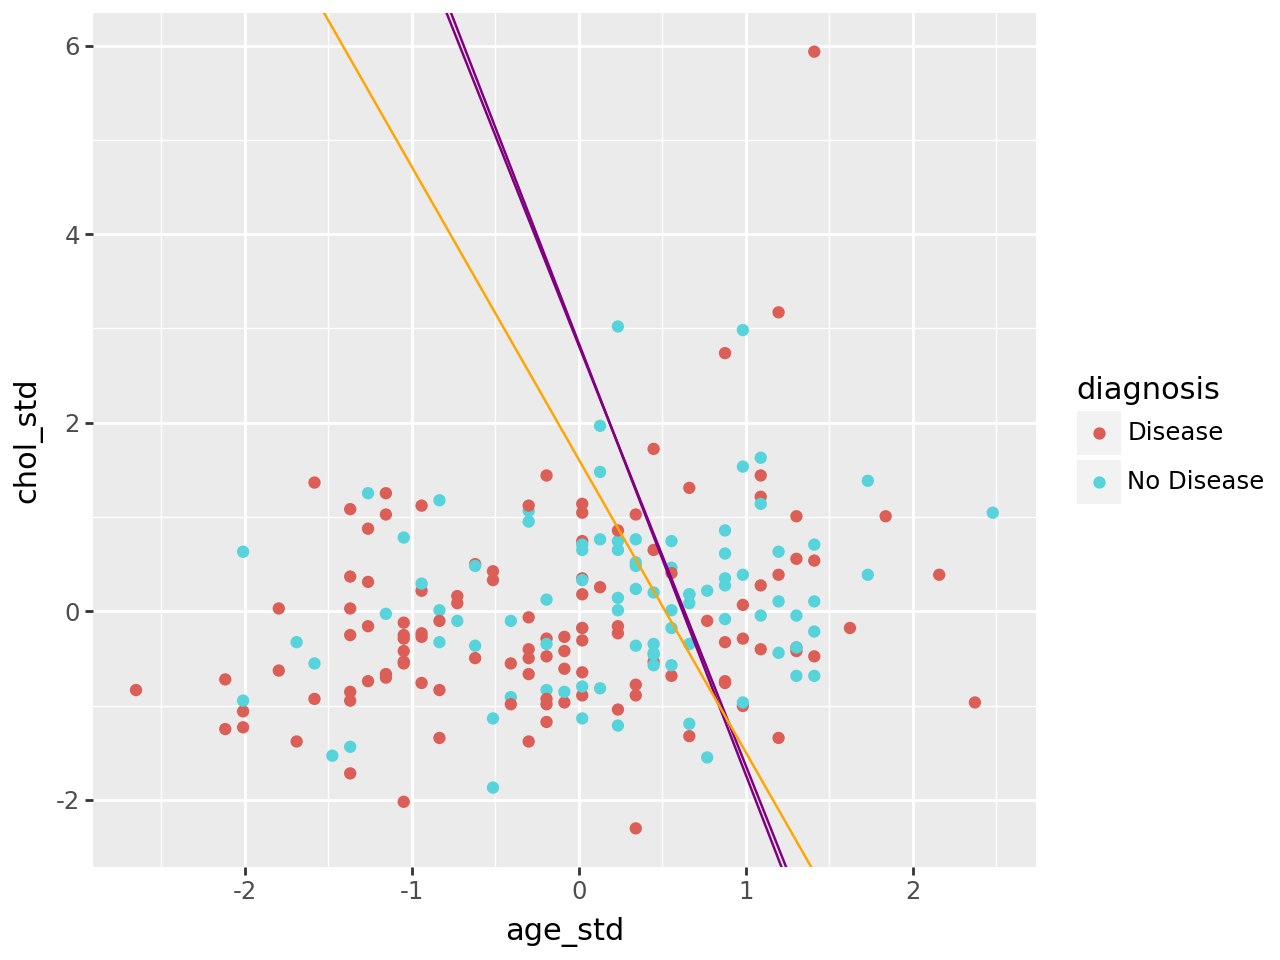

In [84]:
(ggplot(df, aes(x="age_std", y="chol_std", color="diagnosis"))
+ geom_point()
+ geom_abline(intercept = - logistic_intercept / logistic_chol_coef, slope = - logistic_age_coef / logistic_chol_coef, color = "purple")
+ geom_abline(intercept = - lda_intercept / lda_chol_coef, slope = - lda_age_coef / lda_chol_coef, color = "purple")
+ geom_abline(intercept = - svc_intercept / svc_chol_coef, slope = - svc_age_coef / svc_chol_coef, color = "orange"))

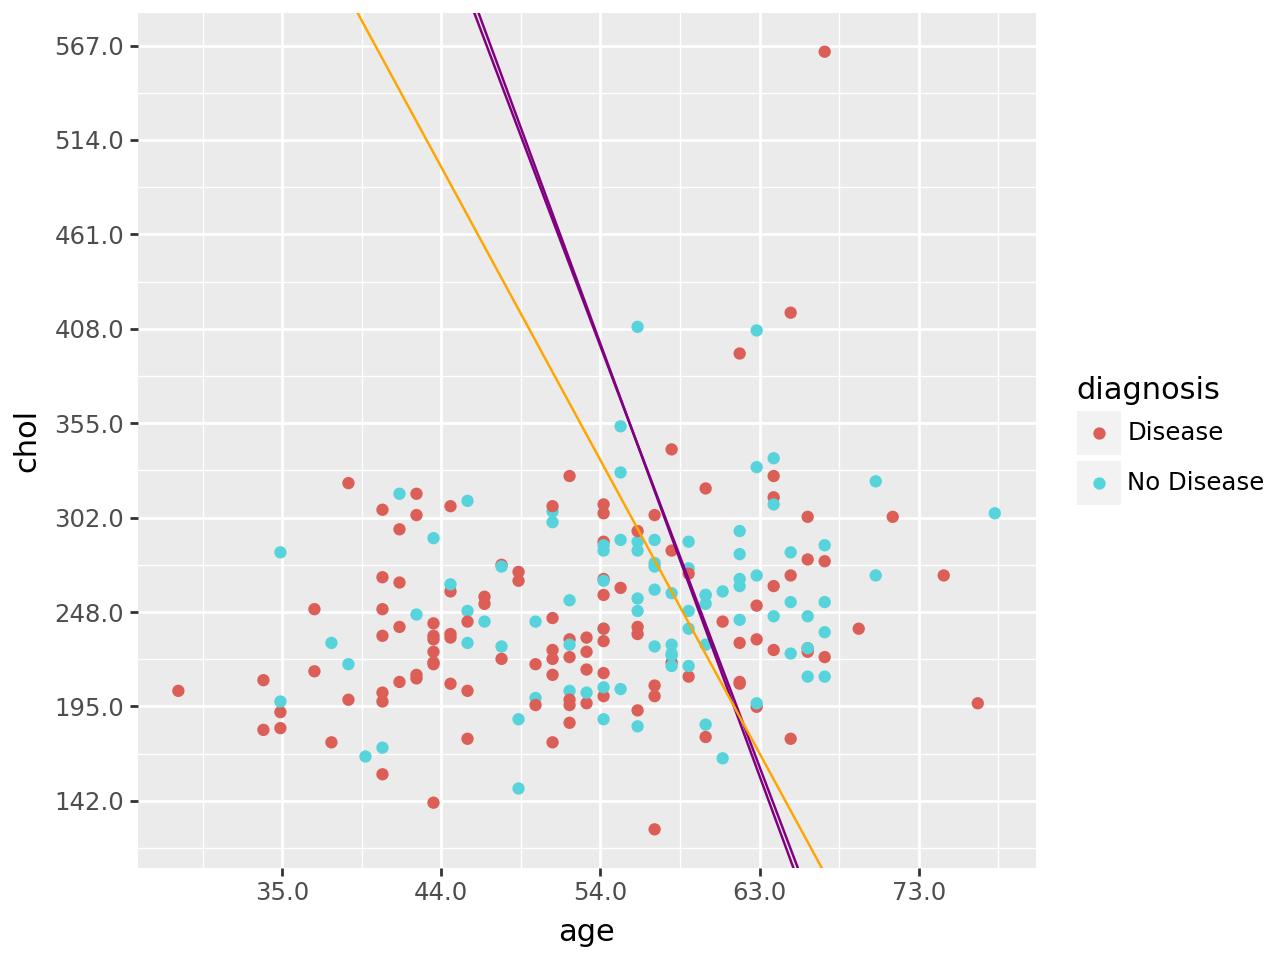

In [85]:
(ggplot(df, aes(x="age_std", y="chol_std", color="diagnosis"))
+ geom_point()
+ geom_abline(intercept = - logistic_intercept / logistic_chol_coef, slope = - logistic_age_coef / logistic_chol_coef, color = "purple")
+ geom_abline(intercept = - lda_intercept / lda_chol_coef, slope = - lda_age_coef / lda_chol_coef, color = "purple")
+ geom_abline(intercept = - svc_intercept / svc_chol_coef, slope = - svc_age_coef / svc_chol_coef, color = "orange")
+ scale_x_continuous(breaks = np.arange(-2, 3), labels = np.round(df["age"].mean() + df["age"].std() * np.arange(-2, 3), 0))
+ scale_y_continuous(breaks = np.arange(-2, 7), labels = np.round(df["chol"].mean() + df["chol"].std() * np.arange(-2, 7), 0))
+ labs(x = "age", y = "chol")
)